In [48]:
from bs4 import BeautifulSoup
import pandas as pd
import requests
from urllib.parse import urlencode
import numpy as np
import polyline
import folium
import pandas
import json
from shapely.geometry import shape
from shapely.geometry.polygon import Polygon

In [8]:
# CJ = {
#   "type": "FeatureCollection",
#   "features": [
#     {
#       "type": "Feature",
#       "properties": {},
#       "geometry": {
#         "type": "LineString",
#         "coordinates": road
#       }
#     }
#   ]
# }

In [50]:
n_visit = pd.read_csv('../data/map/n_visits.csv')

In [51]:
n_visit.head(3)

,district_election_data,N_visits,district_carto
0,Chiniot,1,Chiniot
1,FR Peshawar,1,FR Peshawar
2,Quetta,1,Quetta


In [52]:
n_visit['N_visits'].unique()

array([ 1,  2,  3,  4,  5,  6, 12], dtype=int64)

In [53]:
visited_district = n_visit['district_carto'].unique()

In [54]:
df = pd.read_pickle('../data/routes/routes_2007')

f = open (r'C:\Users\Ilias\Documents\Research project\PCP\assets\data\geocoding\district.geojson')
district = json.load(f)
f.close()    

pol_list = list(df['polylines'])
ls = []
for dict_data in pol_list:
    if pd.isna(dict_data):
        continue
    for item in dict_data['routes']:
        ls.append({'overview_polyline':item['overview_polyline']})
     
  
ftr = []
for item in ls:
    road = polyline.decode(item['overview_polyline']['points'], geojson=True)
    ftr.append({
                  "type": "Feature",
                  "properties": {},
                  "geometry": {
                    "type": "LineString",
                    "coordinates": road
                  }
                })
    
collection_roads = {
  "type": "FeatureCollection",
  "features": ftr
}

intersect_district = []
for each_road in collection_roads['features']:
    road = shape(each_road['geometry'])
    for dist in district['features']:
        district_polygon = shape(dist['geometry'])
        if road.intersects(district_polygon):
            intersect_district.append(dist['properties']['districts'])

# print list of intersecting districts with Chief Justice Roads            
intersect_district = list(set(visited_district))

ftr_in = []
for item in district['features']:
    if item['properties']['districts'] in intersect_district:
        ftr_in.append(item)
               
ftr_out = []
for item in district['features']:
    if item['properties']['districts'] not in intersect_district:
        ftr_out.append(item)
        
dist_in = {
  "type": "FeatureCollection",
  "features": ftr_in
}

dist_out = {
  "type": "FeatureCollection",
  "features": ftr_out
}

In [55]:
df = pd.read_pickle('../data/routes/routes_2008_2009')

f = open (r'C:\Users\Ilias\Documents\Research project\PCP\assets\data\geocoding\district.geojson')
district = json.load(f)
f.close()    

pol_list = list(df['polylines'])
ls = []
for dict_data in pol_list:
    if pd.isna(dict_data):
        continue
    for item in dict_data['routes']:
        ls.append({'overview_polyline':item['overview_polyline']})
     
  
ftr = []
for item in ls:
    road = polyline.decode(item['overview_polyline']['points'], geojson=True)
    ftr.append({
                  "type": "Feature",
                  "properties": {},
                  "geometry": {
                    "type": "LineString",
                    "coordinates": road
                  }
                })
    
collection_roads_2009 = {
  "type": "FeatureCollection",
  "features": ftr
}

# intersect_district = []
# for each_road in collection_roads['features']:
#     road = shape(each_road['geometry'])
#     for dist in district['features']:
#         district_polygon = shape(dist['geometry'])
#         if road.intersects(district_polygon):
#             intersect_district.append(dist['properties']['districts'])

# # print list of intersecting districts with Chief Justice Roads            
# intersect_district = list(set(intersect_district))

# ftr_in = []
# for item in district['features']:
#     if item['properties']['districts'] in intersect_district:
#         ftr_in.append(item)
               
# ftr_out = []
# for item in district['features']:
#     if item['properties']['districts'] not in intersect_district:
#         ftr_out.append(item)
        
# dist_in = {
#   "type": "FeatureCollection",
#   "features": ftr_in
# }

# dist_out = {
#   "type": "FeatureCollection",
#   "features": ftr_out
# }


C:\Users\Ilias\AppData\Local\Temp\ipykernel_9344\1268642816.py:76: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import display, HTML



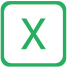
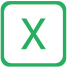
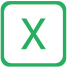
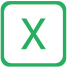
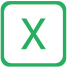
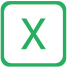
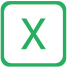
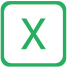
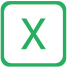
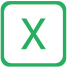
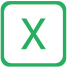
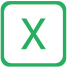
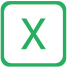
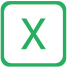
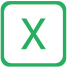
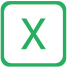
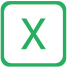
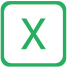
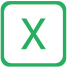
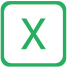
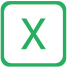
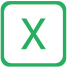
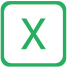
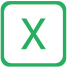
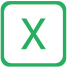
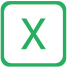
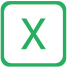
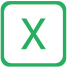
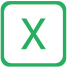
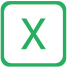
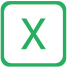
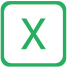
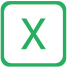
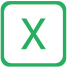
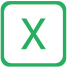
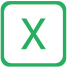
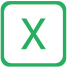
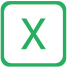
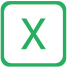
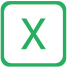
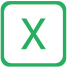
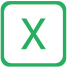
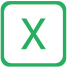
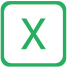
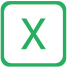
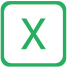
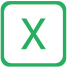
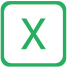
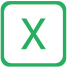
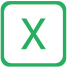
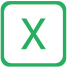
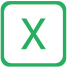
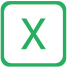
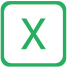
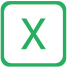
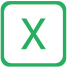
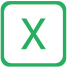
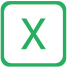
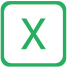
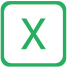
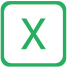
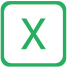
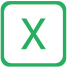
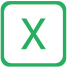
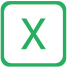
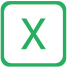
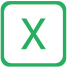
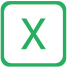
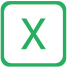
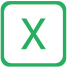
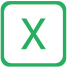
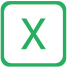
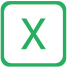
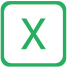
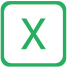
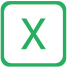

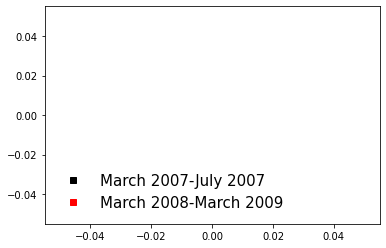

In [88]:
import matplotlib.pyplot as plt

colors = ["black", "red"]
f = lambda m,c: plt.plot([],[],marker=m, color=c, ls="none")[0]
handles = [f("s", colors[i]) for i in range(2)]
labels = ['March 2007-July 2007', 'March 2008-March 2009']
legend = plt.legend(handles, labels, loc=3, framealpha=1, frameon=False, fontsize=15)

def export_legend(legend, filename="legend.png"):
    fig  = legend.figure
    fig.canvas.draw()
    bbox  = legend.get_window_extent().transformed(fig.dpi_scale_trans.inverted())
    fig.savefig(filename, dpi="figure", bbox_inches=bbox)

export_legend(legend)


m1 = folium.Map(location=[30.7273, 71.09886], zoom_start=5.4, tiles="cartodbpositron")

style_function = lambda x: {
    'color' : x['properties']['color'],
    'weight' : x['properties']['stroke-width']
}


style_in = {'fillColor': '#0000FF', 'color': '#808080', 'weight':0.3} 

#'fillColor': '#FFE4C4',
style_out = { 'fillColor': '#CCCCCC', 'color':'#808080', 'weight':0.3} 

style_road = {'lineColor': '#FF0000', 'color': '#000000', 'weight':1}

style_road_2009 = {'lineColor': '#FF0000', 'color': '#B22222', 'weight':1}


#folium.GeoJson(district, style_function = lambda x: style).add_to(m1)
choropleth = folium.Choropleth(
    geo_data=r'C:\Users\Ilias\Documents\Research project\PCP\assets\data\geocoding\district.geojson',
    name="choropleth",
    data=n_visit,
    columns=['district_carto', "N_visits"],
    key_on="feature.properties.districts",
    fill_color="YlGnBu",
    nan_fill_color="#EDEADE",
    fill_opacity=1,
    line_opacity=0.2,
    legend_name="Number of visits by Chief Justice",
).add_to(m1)
# folium.GeoJson(dist_in, style_function = lambda x: style_in).add_to(m1)
# folium.GeoJson(dist_out, style_function = lambda x: style_out).add_to(m1)

folium.GeoJson(collection_roads, style_function = lambda x: style_road).add_to(m1)


folium.GeoJson(collection_roads_2009, style_function = lambda x: style_road_2009).add_to(m1)

# folium.LayerControl().add_to(m1)

from folium.plugins import FloatImage
image_file = 'legend.png'

FloatImage(image_file, bottom=80, left=70).add_to(m1)

for item in collection_roads_2009['features']:
    start = list(item['geometry']['coordinates'][0])
    start.reverse()
    end = list(item['geometry']['coordinates'][-1])
    end.reverse()
#     print(end)
    folium.Marker(start, icon=CustomIcon("icon.png", icon_size=(10, 10))).add_to(m1)
    folium.Marker(end, icon=CustomIcon("icon.png", icon_size=(10, 10))).add_to(m1)

choropleth.geojson.add_child(
    folium.features.GeoJsonTooltip(['districts'], labels=False))

from IPython.core.display import display, HTML
display(HTML("<style>.container { width:80% !important; }</style>"))
m1

In [91]:
ls = []
for item in district['features']:
    ls.append(item['properties']['districts'])

In [93]:
print(ls)

['Bannu', 'Sudhnutti', 'Killa Abdullah', 'FR Tank', 'Hangu', 'Chiniot', 'Lahore', 'Islamabad', 'Charsadda', 'Mardan', 'Bagh', 'Peshawar', 'Bhimber', 'Hattian', 'Haveli', 'Mirpur', 'Sohbatpur', 'Sherani', 'Orakzai Agency', 'Lehri', 'Kotli', 'Muzaffarabad', 'Neelum', 'Poonch', 'Awaran', 'Barkhan', 'Chaghi', 'Dera Bugti', 'Kohlu', 'Gwadar', 'Harnai', 'Jaffarabad', 'Jhal Magsi', 'Kachhi', 'Kalat', 'FR Peshawar', 'Kech', 'Kharan', 'Loralai', 'Khuzdar', 'Killa Saifullah', 'Lasbela', 'FR DI Khan', 'Mastung', 'Musakhail', 'Nasirabad', 'Nushki', 'Khyber Agency', 'Panjgur', 'Pishin', 'Quetta', 'Sibi', 'Kurram Agency', 'Mohmand Agency', 'Washuk', 'Zhob', 'Ziarat', 'Bajaur Agency', 'FR Bannu', 'FR Kohat', 'FR Lakki Marwat', 'Bhakkar', 'North Waziristan Agency', 'South Waziristan Agency', 'Astor', 'Skardu', 'Diamir', 'Ghanchi', 'Ghizer', 'Gilgit', 'Hunza Nagar', 'Abbottabad', 'Batagram', 'Nowshera', 'Buner', 'Chitral', 'Gujrat', 'Dera Ismail Khan', 'Haripur', 'Karak', 'Kohat', 'Kohistan', 'Lakki Ma